In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np

## Basic setup

Create anaconda environment
<br>
```bash
conda create -n ml python=3.7.4 jupyter
```
Install fastai library
<br>
```bash
conda install -c pytorch -c fastai fastai
```

# Supported Vector Machine (SVM)

## Large Margin Classifier

From logistic regression we know that 
$$f(x, W) = \frac{1}{1 + e^{-W^TX}}$$

In [1]:
def sigm(x):
    return 1 / (1 + np.exp(-x))

In [2]:
x = np.linspace(-6, 6, 100)

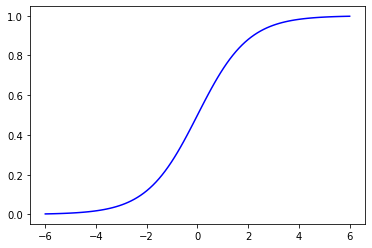

In [5]:
plt.plot(x, sigm(x),'b', label='linspace(-10,10,100)')

if $y = 1$ then our goal is $f(x, W) \approx 1$ and by the nature the logistic function $W^Tx >> 0$

On the other heand if we have $y = 0$ then $f(x, W) \approx 0$ and again by the nature of logistic function $W^Tx << 0$

Cost function for logistic regression for the single training example:
$$-(y\log f(x, W) + (1 - y)\log(1 - f(x, W)))$$

Or if we put $f(x, W)$:
$$-y\log(\frac{1}{1 + e^{-W^TX}}) - (1 - y)\log(1 - \frac{1}{1 + e^{-W^TX}})$$

Now if $y = 1$ then only matters:
$$-y\log(\frac{1}{1 + e^{-W^TX}})$$ part of equasion ($(1 - y) = 0$ and second part will be zero)

Denote $Z = W^Tx$ then we have 
$$\frac{1}{1 + e^{-Z}}$$

In [6]:
Z = np.linspace(-6, 6, 100)

In [7]:
def left_sig(x):
    return -np.log((1 / (1 + np.exp(-x))))

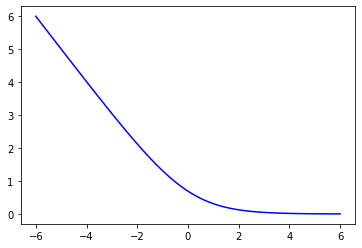

In [8]:
plt.plot(Z, left_sig(Z),'b', label='left')

When $Z$ is large then value is near zero

In [9]:
def right_sig(x):
    return -np.log(1 - (1 / (1 + np.exp(-x))))

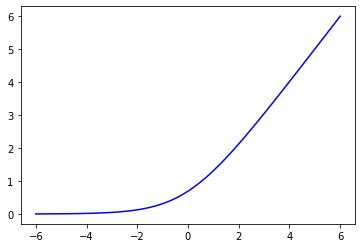

In [10]:
plt.plot(x, right_sig(Z),'b', label='right')

In [11]:
cost_1 = left_sig

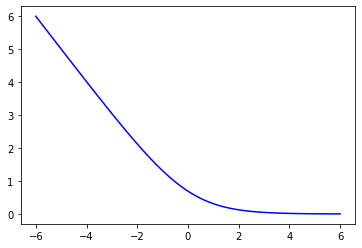

In [12]:
plt.plot(x, cost_1(Z),'b', label='left')

In [13]:
 def cost_1(x):
    return [max(0, -x_i + 1) for x_i in x]

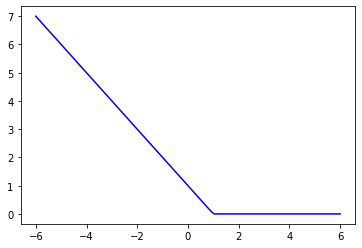

In [17]:
#<div class="pirk">
plt.plot(x, cost_1(Z),'b', label='left')
#</div><i class="fa fa-lightbulb-o ">
#</i>

In [18]:
cost_0 = right_sig

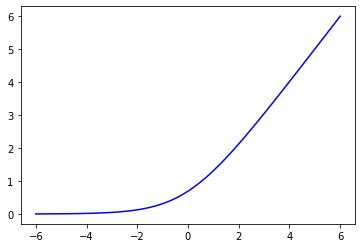

In [19]:
plt.plot(x, cost_0(Z),'b', label='right')

In [20]:
def cost_0(x):
    return [max(0, x_i - 1) for x_i in x]

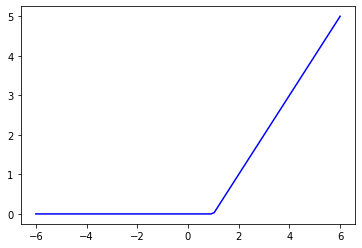

In [21]:
plt.plot(x, cost_0(Z),'b', label='left')

Cost for logistic regression:
$$\min_W\frac{1}{m} [\sum_{i=1}^{m}y^{(i)}(-\log f(W^{(i)}, x^{(i)}) - (1 - y^{(i)})(-\log(1 - f(W^{(i)}, x^{(i)}))))]$$

Or with regularization:
Cost for logistic regression:
$$\min_W\frac{1}{m} [\sum_{i=1}^{m}y^{(i)}(-\log f(W^{(i)}, x^{(i)}) - (1 - y^{(i)})(-\log(1 - f(W^{(i)}, x^{(i)}))))] + \frac{\lambda}{2m}\sum_{i=1}^{n}w_i^2$$
Different numbers $m$ and $n$

Now let's remove $\frac{1}{m}$ and lets $C = \frac{1}{\lambda}$ then:


$$\min_WC[\sum_{i=1}^{m}y^{(i)}cost_1(W^{(i)^T}x^{(i)}) - (1 - y^{(i)})cost_0(W^{(i)T}x^{(i)}))] + \frac{1}{2}\sum_{i=1}^{n}w_i^2$$

Supported Vector Machine does not output the probability:
$$f(W, x) = \begin{cases}1 & \text{if }W^Tx \ge 0 \\ 0 & \text{otherwise }\end{cases}$$

$$\min_W[\sum_{i=1}^{m}y^{(i)}cost_1(W^{(i)^T}x^{(i)}) - (1 - y^{(i)})cost_0(W^{(i)^T}x^{(i)}))] + \frac{1}{2}\sum_{i=1}^{n}w_i^2$$

if $y = 1$ we want $W^Tx \ge 1$ instead of $W^Tx \ge 0$
<br>
if $y = 0$ we want $W^Tx \le -1$ instead of $W^Tx \lt 0$

Large Margin Classifier
<img src="images/svm/svm1.png">

Maximum among the minimums

Let us choose higher value of $C$

Choise of $C$ parameter:
<img src="images/svm/svm2.png">

By the definition $C = \frac{1}{\lambda}$ and therefore large $C$ means small $\lambda$ and small $C$ means the larger $\lambda$

## Geometry Behind the SVM

Let us observer optimization objectives of SVM:
$$\frac{1}{2}\sum_{i=1}^{n}w_i^2$$
$$W^Tx \ge 1$$
$$W^Tx \le -1$$

From the definition of Euclidean norm $||v|| = \sqrt{\sum_{i=1}^{n}v_i^2}$
$$\sum_{i=1}^{m}w_i^2 = ||W||^2$$
Where $W = (w_1, w_2, \dots, w_n)$

Inner product of vectors:
$$W^Tx = x_w||W||$$ 
Where $x_w$ is a length of the projection of $x$ vector on the $W$ vector

Then we have a optimization objectives:
$$\frac{1}{2}||W||^2$$
$$x_w||W|| \ge 1$$
$$x_w||W|| \le -1$$
<br>
<img src="images/svm/svm3.png">

## Kernels

Suppose we have a data:
<img src="images/svm/svm4.png">

We could have a polinomial function:
$$f(x, W) = w_0 + x_1w_1 + x_2w_1w_2 + \dots x_nw_n^r$$
<br>
and then find:
$$f(x, W) \ge 0$$
$$f(x, W) \le -0$$

Let us put some lendmarks near the data points $l^{(1)}, l^{(2)}, \dots l^{(m)}$ and define features $f_1, f_2, \dots f_m$:
<br>
$$f_i = \exp(-\frac{||x - l^{(i)}||^2}{2\sigma^2})$$

<img src="images/svm/svm5.png">

## Choosing the Features

Lets choose the features by the training examples:
$$x = (x^{(1)}, x^{(2)}, \dots, x^{(m)})$$
<br>
Choose the features:
$$f = (f^{(1)}, f^{(2)}, \dots, f^{(m)})$$
<br>
by the Gaussian distance

This means that we will need the $W \in \mathbb{R}^{m+1}$ instead of $W \in \mathbb{R}^{n+1}$ (with bias)
<br>
and our cost will be:
$$\min_WC[\sum_{i=1}^{m}y^{(i)}cost_1(w^{(i)^T}f^{(i)}) - (1 - y^{(i)})cost_0(w^{(i)^T}f^{(i)}))] + \frac{1}{2}\sum_{i=1}^{m}w_i^2$$
<br>
Here parameters $m$ and $n$ are the same for training examples and for regularization respectively

For regularization instead of $\sum_{i=1}^{m}w_i^2 = W^TW$ offen is used 
$$W^TMW$$ 
for some matrix $M$ for large $m$ ($m = 10000$ or even $m \ge 1000000$) for optimization purposes

We can aolso apply the kernels to the logistic regression but computation will be very slow, this computation reduction does not goes well with logistic regression and that's why SVM is preffered in many cases

So we kn ow about optimization objectives and the cost function of SVM, for practical use better use softwares which has numerical optimized implementations and we don't have to worry about them

## Choosing the C Parameter (Bias Variance Tradeoff)

Recall that:
$$C = \frac{1}{\lambda}$$
and therefore:
- Large value of $C$ means small $\lambda$ which implies lower bias / high variance (overfitting)
- Small value of $C$ means large $\lambda$ which implies higher bias / low variance (underfitting)

If we use Gaussian kernel then:
- If $\sigma^2$ is large, features $f_i$ vary smoothly and this might cause higher bias / low variance (underfitting)
- If $\sigma^2$ is small, features $f_i$ vary less smoothly and this might cause lower bias / high variance (overfitting)

Recall that:
$$f_i = \exp(-\frac{||x - l^{(i)}||^2}{2\sigma^2})$$
<br>

<img src="images/svm/svm6.png">

The Gaussian kernel is an instance of more general Radial Basis Function:
$$\varphi(\mathbf{x}) = \varphi(\left\|\mathbf{x}-\mathbf{c}\right\|)$$
or even
$$\varphi(\mathbf{x}) = \varphi(d(\mathbf{x},\mathbf{c}))$$
Which is defined as function of some metrics (Euclidean distance generated from norm or even some arbitrary metrics)

## Implementation of SVM with scikit-learn library

In [22]:
! pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/levan/anaconda3/envs/edu/lib/python3.7/site-packages (0.22)


In [23]:
from sklearn import svm

In [24]:
lin_clf = svm.LinearSVC()

In [25]:
krn_clf = svm.SVC(C=10.0, kernel='rbf', degree=3, gamma='scale')

In [26]:
??krn_clf

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
X = [[0, 0], [1, 1]]
y = [0, 1]

In [30]:
lin_clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [31]:
krn_clf.fit(X, y)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)